<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Получение-данных-и-их-оценка" data-toc-modified-id="Получение-данных-и-их-оценка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Получение данных и их оценка</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-признаков,-целевого-признака-и-разбиение-на-выборки" data-toc-modified-id="Подготовка-признаков,-целевого-признака-и-разбиение-на-выборки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка признаков, целевого признака и разбиение на выборки</a></span><ul class="toc-item"><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li></ul></li><li><span><a href="#Построение-моделей,-исследование-и-подбор-гиперпараметров" data-toc-modified-id="Построение-моделей,-исследование-и-подбор-гиперпараметров-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение моделей, исследование и подбор гиперпараметров</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier-в-качестве-пробной-модели" data-toc-modified-id="DecisionTreeClassifier-в-качестве-пробной-модели-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>DecisionTreeClassifier в качестве пробной модели</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Нахождение-оптимальных-параметров-моделей" data-toc-modified-id="Нахождение-оптимальных-параметров-моделей-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Нахождение оптимальных параметров моделей</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из банка стали уходить клиенты. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Задача: спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Перед нами задача классификации.

Подробности: нужно построить модель на основе алгоритмов машинного обучения, которая спрогнозирует отток клиентов банка. Нужно построить модель с предельно большим значением *F1*-меры (больше 0.59) на тестовой выборке. 

Дополнительно: нужно измерить *AUC-ROC*, сравнивнить её значение с *F1*-мерой.

## Получение данных и их оценка

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 

In [2]:
pd.options.mode.chained_assignment = None
df = pd.read_csv('/datasets/Churn.csv')
display(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


### Описание данных

**Признаки:**

`RowNumber` — индекс строки в данных

`CustomerId` — уникальный идентификатор клиента

`Surname` — фамилия

`CreditScore` — кредитный рейтинг

`Geography` — страна проживания

`Gender` — пол

`Age` — возраст

`Tenure` — сколько лет человек является клиентом банка

`Balance` — баланс на счёте

`NumOfProducts` — количество продуктов банка, используемых клиентом

`HasCrCard` — наличие кредитной карты

`IsActiveMember` — активность клиента

`EstimatedSalary` — предполагаемая зарплата

**Целевой признак:**

`Exited` — факт ухода клиента

## Предобработка данных

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
print(df.isna().sum())

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


In [5]:
print(df.duplicated().sum())

0


In [6]:
print(df['Geography'].unique())
print(df['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


**Tenure**

То, сколько лет человек является клиентом банка, является важной информацие для анализа целевого признака, пропуски в этом столбце могут существенно повлиять на итоговый результат, поэтому избавимся от них.

In [7]:
df = df.dropna()

Удалим также ненужные признаки из таблицы.

In [8]:
df = df.drop('Surname', axis=1)
df = df.drop('CustomerId', axis=1)
df = df.drop('RowNumber', axis=1)

In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
display(df)
df.info()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9091 non-null   int64  
 1   Age                9091 non-null   int64  
 2   Tenure             9091 non-null   float64
 3   Balance            9091 non-null   float64
 4   NumOfProducts      9091 non-null   int64  
 5   HasCrCard          9091 non-null   int64  
 6   IsActiveMember     9091 non-null   int64  
 7   EstimatedSalary    9091 non-null   float64
 8   Exited             9091 non-null   int64  
 9   Geography_Germany  9091 non-null   uint8  
 10  Geography_Spain    9091 non-null   uint8  
 11  Gender_Male        9091 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 736.9 KB


## Подготовка признаков, целевого признака и разбиение на выборки

In [11]:
target = df['Exited']
features = df.drop('Exited', axis=1)

features_train, features_1, target_train, target_1 = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_1, target_1, test_size=0.5, random_state=12345)




In [12]:
print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)

(5454, 11) (1818, 11) (1819, 11)
(5454,) (1818,) (1819,)


### Масштабирование признаков

In [13]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## Построение моделей, исследование и подбор гиперпараметров


### DecisionTreeClassifier в качестве пробной модели

In [14]:
model = DecisionTreeClassifier(random_state=12345, max_depth=7)

model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5764331210191083


Метрика неудовлетворительная

### Борьба с дисбалансом

In [15]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [16]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

**Взвешивание классов, логистическая регрессия**

In [17]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.509731232622799


Метрика неудовлетворительная

**upsampling, логистическая регрессия**

In [18]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

model = LogisticRegression(solver='liblinear', random_state=12345, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)

predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.509731232622799


Метрика неудовлетворительная

**downsampling, логистическая регрессия**

In [19]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.39)

model = LogisticRegression(solver='liblinear' ,random_state=12345, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)

predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5109890109890111


Метрика неудовлетворительная

### Нахождение оптимальных параметров моделей

**Нахождение оптимального порога классификации для логистической регрессии**

In [20]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision, recall))

Порог = 0.00 | Точность = 0.207, Полнота = 1.000
Порог = 0.02 | Точность = 0.208, Полнота = 1.000
Порог = 0.04 | Точность = 0.217, Полнота = 0.992
Порог = 0.06 | Точность = 0.233, Полнота = 0.968
Порог = 0.08 | Точность = 0.254, Полнота = 0.950
Порог = 0.10 | Точность = 0.271, Полнота = 0.910
Порог = 0.12 | Точность = 0.295, Полнота = 0.894
Порог = 0.14 | Точность = 0.313, Полнота = 0.857
Порог = 0.16 | Точность = 0.336, Полнота = 0.822
Порог = 0.18 | Точность = 0.358, Полнота = 0.769
Порог = 0.20 | Точность = 0.377, Полнота = 0.727
Порог = 0.22 | Точность = 0.400, Полнота = 0.692
Порог = 0.24 | Точность = 0.416, Полнота = 0.639
Порог = 0.26 | Точность = 0.443, Полнота = 0.586
Порог = 0.28 | Точность = 0.465, Полнота = 0.538


**Нахождение оптимальных параметров для модели Случайного леса**

In [22]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(1, 20):
    for depth in range (1, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced') 
        model.fit(features_train, target_train) 
        predicted_valid = model.predict(features_valid) 
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("F1 наилучшей модели на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth)

F1 наилучшей модели на валидационной выборке: 0.6497584541062802 Количество деревьев: 10 Максимальная глубина: 19


**Нахождение оптимальных параметров для модели Случайного леса с использованиемс порога классификации и метода downsamplе**

In [23]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0

best_r = 0
best_e = 0

for est in range(4, 15):
    for depth in range (4, 15):
        for r in np.arange(0.11, 0.15, 0.01):
            for e in np.arange(0.65, 0.69, 0.01):

                
                
                features_downsampled, target_downsampled = downsample(features_train, target_train, r)

                model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, class_weight='balanced')
                model.fit(features_downsampled, target_downsampled)

                probabilities_valid = model.predict_proba(features_valid)
                probabilities_one_valid = probabilities_valid[:, 1]
                predicted_valid = probabilities_one_valid > e

                result = f1_score(target_valid, predicted_valid)
                if result > best_result:
                    best_model = model
                    best_result = result
                    best_est = est
                    best_depth = depth
                    best_r = r
                    best_e = e
                    
print('F1 best:', best_result, 'best_est:', best_est, 'best_depth:', best_depth, 'best_r:', best_r, 'best_e:', best_e)


F1 best: 0.6514131897711978 best_est: 13 best_depth: 6 best_r: 0.11 best_e: 0.67


**Пример работы модели с оптимальными параметрами:**

In [37]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.11)

model = RandomForestClassifier(random_state=12345, max_depth=6, n_estimators=13, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
predicted_valid = probabilities_one_valid > 0.67

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6514131897711978


## Тестирование лучшей модели

In [43]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.11)

model = RandomForestClassifier(random_state=12345, max_depth=6, n_estimators=13, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > 0.67

print("F1:", f1_score(target_test, predicted_test))

F1: 0.6023054755043228


In [36]:
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8564116149266012


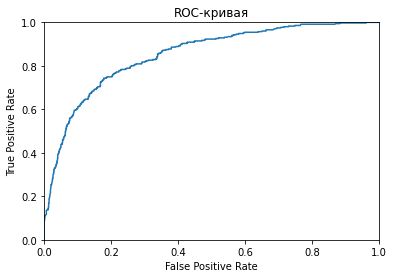

In [26]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 


## Вывод 

Модель, предсказывающая уход клиента из банка построена. Проведен баланс классов, применен метод downsample, найден оптимальный порог классификации. Удалось добиться значения 0.6 метрики F1 на тестовых данных.
Вот такие дела.